# HR Churn Prediction

## Import librabry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('HR_Data.csv')

In [3]:
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
df.shape

(8998, 18)

In [5]:
df.columns

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

### Explaratory data analysis

In [6]:
#checking dataset has any null value or not
df.isna().sum().sum()

0

In [7]:
df.dtypes

SLNO                             int64
Candidate.Ref                    int64
DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [8]:
df['Status'].value_counts()

Joined        7316
Not Joined    1682
Name: Status, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

Target variable is highly imbalanced. I will use upsampling to balanced it.

It is always beneficial to find the column which have only two variables.

In [10]:
columns=df.columns
bi_cols=[]
for col in columns:
    if df[col].value_counts().shape[0]==2:
        bi_cols.append(col)

In [11]:
bi_cols #categorical feature with two classes.

['DOJ.Extended',
 'Joining.Bonus',
 'Candidate.relocate.actual',
 'Gender',
 'Status']

In [12]:
#other columns has more than two categorical features.
multiple_col_cat=['Offered.band','Candidate.Source','LOB','Location']

#### Binary catergorical feature

Checking the class distribution for binary features

<AxesSubplot:xlabel='Gender', ylabel='count'>

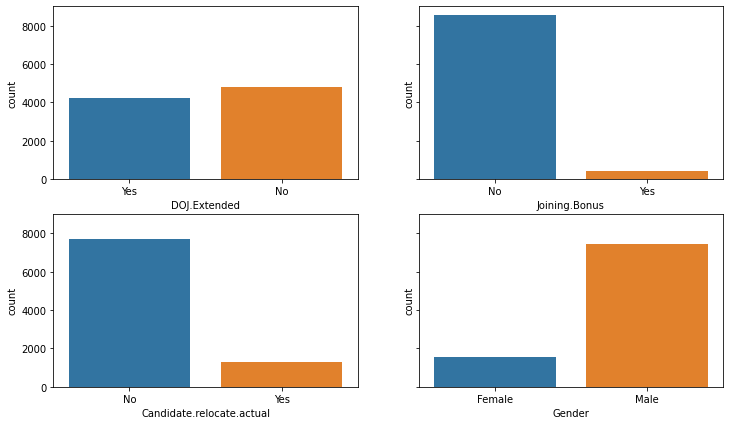

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)

sns.countplot(x="DOJ.Extended", data=df, ax=axes[0,0])
sns.countplot(x="Joining.Bonus", data=df, ax=axes[0,1])
sns.countplot(x="Candidate.relocate.actual", data=df, ax=axes[1,0])
sns.countplot(x="Gender", data=df, ax=axes[1,1])

There is highly imbalanced in Joining Bonus, candiate relocate actual and gender column.

it is better to check how the target variable (Status) changes according to binary features. That's why i will convert "joind"=1
"not joined"=0

In [18]:
status_numeric={"Joined":1,"Not Joined":0}
df.Status.replace(status_numeric,inplace=True)

In [19]:
df[['DOJ.Extended','Status']].groupby(['DOJ.Extended']).mean()

,Status
DOJ.Extended,
No,0.810856
Yes,0.815589


Average churn status is almost same. It will not effect our model.

In [20]:
df[['Joining.Bonus','Status']].groupby(['Joining.Bonus']).mean()

,Status
Joining.Bonus,
No,0.813425
Yes,0.805755


In [21]:
df[['Candidate.relocate.actual','Status']].groupby(['Candidate.relocate.actual']).mean()

,Status
Candidate.relocate.actual,
No,0.781785
Yes,1.000000


In [22]:
df[['Gender','Status']].groupby(['Gender']).mean()

,Status
Gender,
Female,0.823985
Male,0.810796


avobe this binary feature by checking mean ,we can drop Gender, joining bonus,Doj extended

#### Other Categorical feature

<AxesSubplot:xlabel='Offered.band', ylabel='count'>

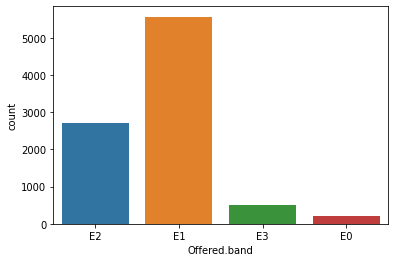

In [24]:
sns.countplot(x="Offered.band", data=df)

<AxesSubplot:xlabel='Candidate.Source', ylabel='count'>

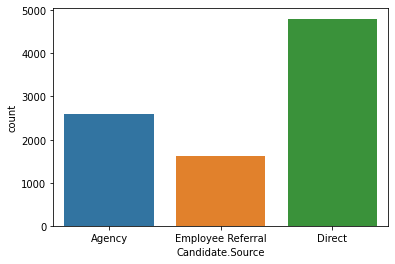

In [25]:
sns.countplot(x="Candidate.Source", data=df)

<AxesSubplot:xlabel='LOB', ylabel='count'>

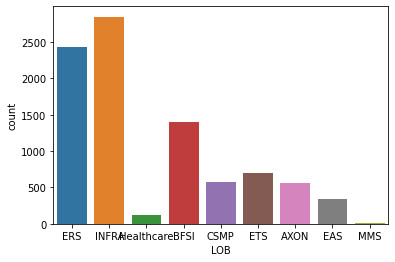

In [26]:
sns.countplot(x="LOB", data=df)

<AxesSubplot:xlabel='Location', ylabel='count'>

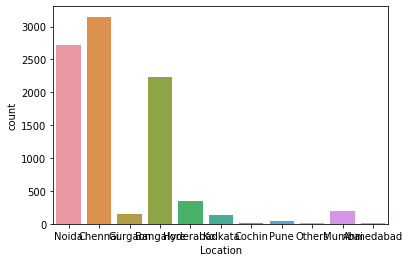

In [28]:
sns.countplot(x="Location", data=df)

In [29]:
df[['Offered.band','Status']].groupby('Offered.band').mean()

,Status
Offered.band,
E0,0.763033
E1,0.813106
E2,0.809735
E3,0.851485


In [30]:
df[['Candidate.Source','Status']].groupby('Candidate.Source').mean()

,Status
Candidate.Source,
Agency,0.758221
Direct,0.820112
Employee Referral,0.880124


In [31]:
df[['LOB','Status']].groupby('LOB').mean()

,Status
LOB,
AXON,0.774648
BFSI,0.758596
CSMP,0.815199
EAS,0.734104
ERS,0.781211
ETS,0.831169
Healthcare,0.822581
INFRA,0.877895
MMS,1.000000


In [32]:
df[['Location','Status']].groupby('Location').mean()

,Status
Location,
Ahmedabad,0.833333
Bangalore,0.781264
Chennai,0.789273
Cochin,0.875000
Gurgaon,0.808219
Hyderabad,0.780059
Kolkata,0.775194
Mumbai,0.893401
Noida,0.866202


in the avobe categorical data is important for our model

### Continuous Variables

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Notice.period', ylabel='Density'>

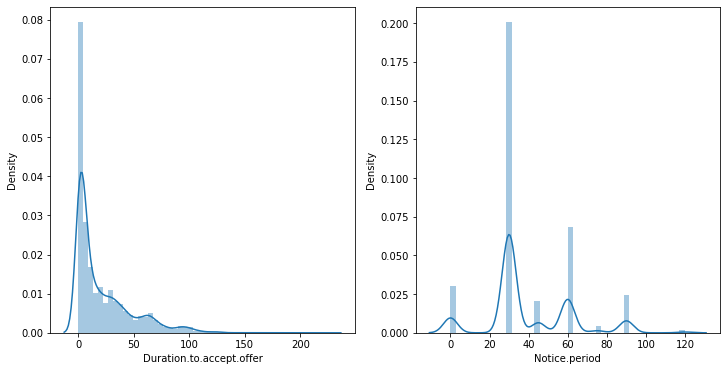

In [40]:
fig, axes = plt.subplots(1,2, figsize=(12,6 ))

sns.distplot(df["Duration.to.accept.offer"], ax=axes[0])
sns.distplot(df["Notice.period"], ax=axes[1])

In [41]:
df[['Duration.to.accept.offer','Notice.period','Status']].groupby('Status').mean()

,Duration.to.accept.offer,Notice.period
Status,,
0,24.956599,48.192628
1,20.617687,37.233461


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percent.hike.offered.in.CTC', ylabel='Density'>

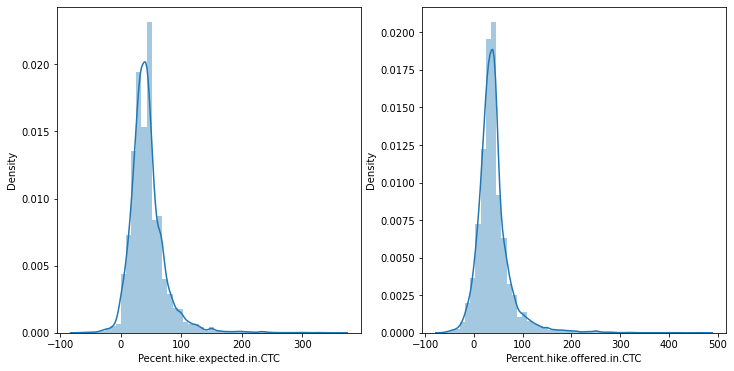

In [42]:
fig, axes = plt.subplots(1,2, figsize=(12,6 ))

sns.distplot(df["Pecent.hike.expected.in.CTC"], ax=axes[0])
sns.distplot(df["Percent.hike.offered.in.CTC"], ax=axes[1])

In [43]:
df[['Pecent.hike.expected.in.CTC','Percent.hike.offered.in.CTC','Status']].groupby('Status').mean()

,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC
Status,,
0,43.882818,38.588460
1,43.875838,41.147158


Here we can drop Percent.hike.expected.in.ctc . mean is same

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Age', ylabel='Density'>

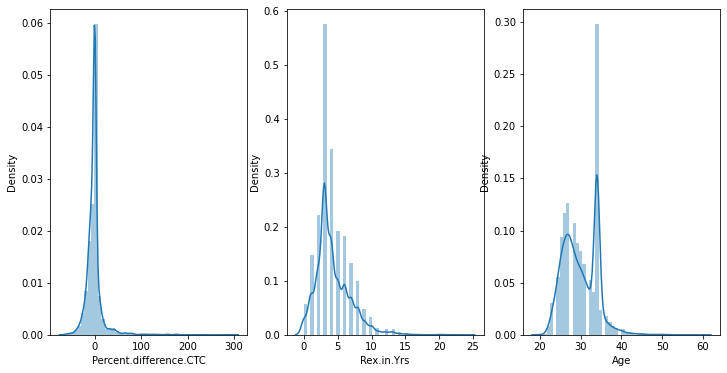

In [44]:
fig, axes = plt.subplots(1,3, figsize=(12,6 ))

sns.distplot(df["Percent.difference.CTC"], ax=axes[0])
sns.distplot(df["Rex.in.Yrs"], ax=axes[1])
sns.distplot(df["Age"], ax=axes[2])

In [45]:
df[['Percent.difference.CTC','Rex.in.Yrs','Age','Status']].groupby('Status').mean()

,Percent.difference.CTC,Rex.in.Yrs,Age
Status,,,
0,-2.929298,4.439358,29.517836
1,-1.263402,4.193002,30.004647


Experience and ages has not much effect of Status column

In [46]:
df.drop(['SLNO','Candidate.Ref','DOJ.Extended','Joining.Bonus','Gender','Pecent.hike.expected.in.CTC','Rex.in.Yrs','Age'],
       axis=1,inplace=True)

In [47]:
df.head()

,Duration.to.accept.offer,Notice.period,Offered.band,Percent.hike.offered.in.CTC,Percent.difference.CTC,Candidate.relocate.actual,Candidate.Source,LOB,Location,Status
0,14,30,E2,13.16,42.86,No,Agency,ERS,Noida,1
1,18,30,E2,320.00,180.00,No,Employee Referral,INFRA,Chennai,1
2,3,45,E2,42.84,0.00,No,Agency,INFRA,Noida,1
3,26,30,E2,42.84,0.00,No,Employee Referral,INFRA,Noida,1
4,1,120,E2,42.59,0.00,Yes,Employee Referral,INFRA,Noida,1


### Data processing

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [49]:
#categorical feature need to convert to number so that machine can calculate.
cat_features=['Offered.band','Candidate.relocate.actual','Candidate.Source','LOB','Location']
X=pd.get_dummies(df,columns=cat_features,drop_first=True)

In [50]:
#data procesisng to continuous variable
sc=MinMaxScaler()
a=sc.fit_transform(df[['Duration.to.accept.offer']])
b=sc.fit_transform(df[['Notice.period']])
c=sc.fit_transform(df[['Percent.hike.offered.in.CTC']])
d=sc.fit_transform(df[['Percent.difference.CTC']])

In [51]:
X['Duration.to.accept.offer']=a
X['Notice.period']=b
X['Percent.hike.offered.in.CTC']=c
X['Percent.difference.CTC']=d

In [52]:
X.shape

(8998, 29)

#### Resampling

Text(0.5, 1.0, 'Class Distribution Before Resampling')

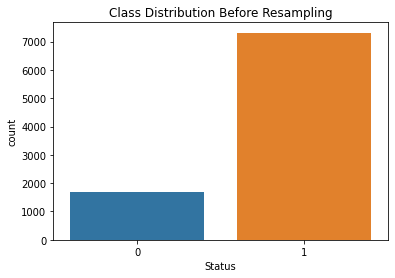

In [54]:
sns.countplot(x='Status', data=df).set_title('Class Distribution Before Resampling')

In [55]:
X_no=X[X.Status==0]
X_yes=X[X.Status==1]

In [56]:
print(len(X_no),len(X_yes))

1682 7316


In [57]:
X_no_upsample=X_no.sample(n=len(X_yes),replace=True,random_state=42)
print(len(X_no_upsample))

7316


In [58]:
X_upsampled=X_yes.append(X_no_upsample).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution after Resampling')

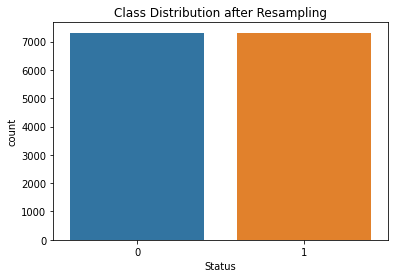

In [60]:
sns.countplot(x='Status',data=X_upsampled).set_title("Class Distribution after Resampling")

## ML Model

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X=X_upsampled.drop(['Status'],axis=1)
y=X_upsampled['Status']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#### Ridge Classifier 
i'm using this is a base model...further i will use another model

In [64]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
#creating a ridge classifier object
ridge=RidgeClassifier()

#train the model
ridge.fit(X_train,y_train)

RidgeClassifier()

In [66]:
pred=ridge.predict(X_train)

In [67]:
accuracy_score(y_train,pred)

0.6709953011533533

In [68]:
confusion_matrix(y_train,pred)

array([[4473, 1374],
       [2477, 3381]])

In [69]:
pred_test=ridge.predict(X_test)

In [70]:
accuracy_score(y_test,pred_test)

0.6672360778954561

### By using random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
r_forest=RandomForestClassifier(n_estimators=100,max_depth=10)

In [73]:
r_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [74]:
pred=r_forest.predict(X_train)

In [75]:
accuracy_score(y_train,pred)

0.8127296027338744

In [76]:
confusion_matrix(y_train,pred)

array([[4952,  895],
       [1297, 4561]])

In [77]:
pred_test=r_forest.predict(X_test)

In [78]:
accuracy_score(y_test,pred_test)

0.7697300990775539

The accuracy on training set is 4% higher than the accuracy on test set which indicates a slight overfitting. Cross-validation  allows to use every sample in training and test set.
GridSearchCV makes this process easy to handle. We can both do cross-validation and try different parameters using GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameters={'n_estimators':[150,200,250,300],'max_depth':[15,20,25]}
forest=RandomForestClassifier()
clf=GridSearchCV(estimator=forest,param_grid=parameters,n_jobs=-1,cv=5)

In [ ]:
clf.fit(X,y)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

90% accuracy is good enough. we have improved the model accuraccy by 10% than previous random forest.

#### End of the project